In [1]:
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/Creditcard_data.csv")
Xdf = df.drop("Class", axis=1).values
ydf = df["Class"].values

us = RandomUnderSampler(random_state=42, replacement=True)
X_us, y_us = us.fit_resample(Xdf, ydf)
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(Xdf, ydf)
os = RandomOverSampler(random_state=42)
X_os, y_os = os.fit_resample(Xdf, ydf)
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(Xdf, ydf)
st = SMOTETomek()
X_st, y_st = st.fit_resample(Xdf, ydf)

sampling = [
    ('Random Undersampling', X_us, y_us),
    ('Near-Miss', X_nm, y_nm),
    ('Random Oversampling', X_os, y_os),
    ('SMOTE', X_sm, y_sm),
    ('SMOTETomek', X_st, y_st),
]

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Extreme Gradient Boosting':xgb.XGBClassifier()
}

In [6]:
!pip install --upgrade scikit-learn xgboost

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd

def perform_cross_validation(model, X, y):
    pipeline = make_pipeline(StandardScaler(), model)
    return cross_val_score(pipeline, X, y, cv=4, scoring=make_scorer(accuracy_score))

results = {}


for model_name, model in models.items():
    model_results = {}
    for dataset in sampling:

        dataset_name, X_train_ds, y_train_ds = dataset
        try:

            scores = perform_cross_validation(model, X_train_ds, y_train_ds)
            model_results[dataset_name] = scores.mean()
        except Exception as e:
            print(f"Error with {model_name} on {dataset_name}: {e}")
    results[model_name] = model_results

dfres = pd.DataFrame(results)

dfres.to_csv("102213002_Result.csv", index=True)

dfres


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_response.py", line 242, in _get_response_values
    y_pred, pos_label = prediction_method(X), None
                        ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", l

,Logistic Regression,Random Forest,Gradient Boosting,K-Nearest Neighbors,Extreme Gradient Boosting
Random Undersampling,0.537500,0.587500,0.737500,0.387500,NaN
Near-Miss,0.475000,0.387500,0.450000,0.375000,NaN
Random Oversampling,0.910864,0.999344,0.893704,0.971158,NaN
SMOTE,0.909540,0.984254,0.882553,0.930529,NaN
SMOTETomek,0.913105,0.977403,0.889734,0.930906,NaN


In [9]:
def best_sample(x):
    bs = x.idxmax()
    ba = x.max()
    return pd.Series({'Sampling Method': bs, 'Accuracy': ba})

best = dfres.apply(best_sample, axis=0)

print("Best Sampling Methods for every Model: ")
best.to_csv("102213002_Best.csv", index=True)
best

Best Sampling Methods for every Model: 


<ipython-input-9-bb6b573fbc2e>:2: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  bs = x.idxmax()


,Logistic Regression,Random Forest,Gradient Boosting,K-Nearest Neighbors,Extreme Gradient Boosting
Sampling Method,SMOTETomek,Random Oversampling,Random Oversampling,Random Oversampling,NaN
Accuracy,0.913105,0.999344,0.893704,0.971158,NaN


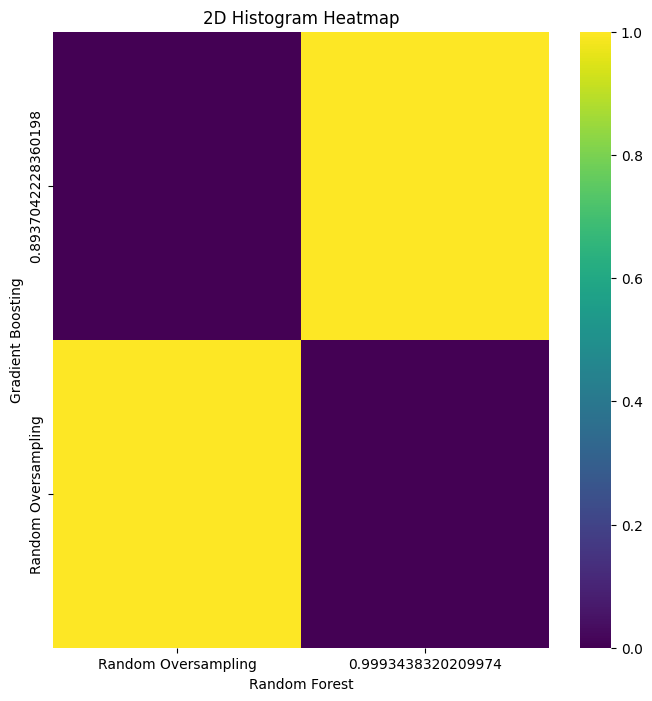

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

best['Random Forest'] = best['Random Forest'].astype(str)
best['Gradient Boosting'] = best['Gradient Boosting'].astype(str)

df_2dhist = pd.DataFrame({
    x_label: grp['Gradient Boosting'].value_counts()
    for x_label, grp in best.groupby('Random Forest', sort=False)  # Disable sorting
})


df_2dhist = df_2dhist.fillna(0)


plt.subplots(figsize=(8, 8))
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Random Forest')
plt.ylabel('Gradient Boosting')
plt.title('2D Histogram Heatmap')
plt.show()


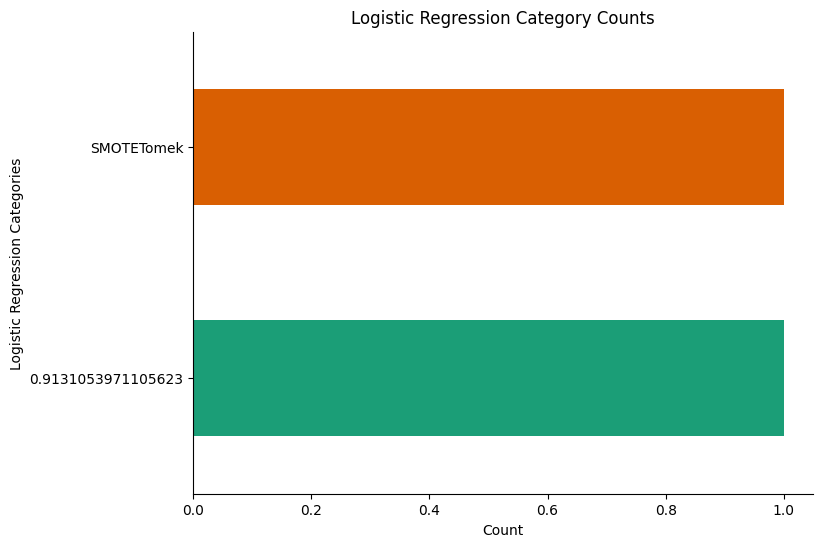

In [15]:
from matplotlib import pyplot as plt
import seaborn as sns


best.groupby('Logistic Regression').size().plot(
    kind='barh',
    color=sns.color_palette('Dark2'),
    figsize=(8, 6)
)

plt.gca().spines[['top', 'right']].set_visible(False)


plt.xlabel('Count')
plt.ylabel('Logistic Regression Categories')
plt.title('Logistic Regression Category Counts')


plt.show()
